In [2]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [15]:
n = 300
alpha = cp.Variable(n)
constraints = [alpha >= 0, cp.sum(alpha) == 1]

z = np.random.randn(n)

#first let's find the range of alpha^T z in the simplex
f = z @ alpha
prob = cp.Problem(cp.Minimize(f), constraints)
lower_bd = prob.solve()
prob = cp.Problem(cp.Minimize(-f), constraints)
upper_bd = -prob.solve()

#next we compute the minimum value of each norm given the scalar product
eps = (upper_bd - lower_bd)/10000
res = []
# x_range = np.linspace(lower_bd + eps, upper_bd - eps, 100)
x_range = np.linspace(-1, 1, 100)
for x in x_range:
    prob = cp.Problem(cp.Minimize(cp.sum_squares(alpha)), constraints + [f == x])
    res += [prob.solve()]
    
    

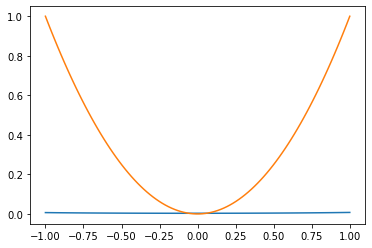

In [19]:
plt.plot(x_range, res)
plt.plot(x_range, x_range**2)